<a href="https://colab.research.google.com/github/VPRR/AI-class/blob/main/A3_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 3-Training an Artificial Neural Network on the MNIST dataset.

Name: Vicente Patricio Rodriguez Reyes

Student ID: 1942691

Subject: Artificial Inteligence

Day & Hour: Tuesday N4

Train an artificial neural network on the MNIST dataset based on the example that we discussed in class. 

Final work.-
Final notebook on colab should have similar structure as we have discussed in class. 
Describe and explain the final results for both train and test sections. 


First, we need to include the libraries that will be referenced in this activity so that we can use certain functions.

In [ ]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

We need to download the MNIST dataset of handwritten digits that  we can import from the keras datasets, as well as define the labels and images for training and testing.

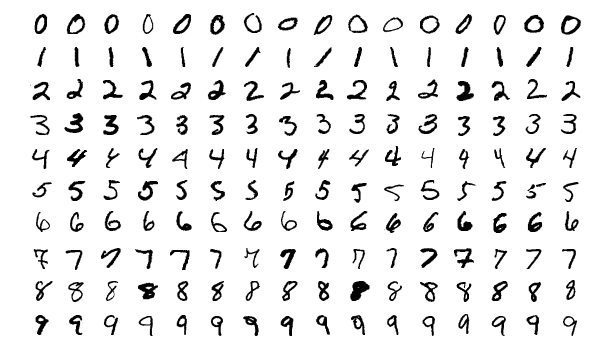

In [85]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data(path="mnist.npz")

We name the classes that will define the images.

In [86]:
class_names = ['Num_0','Num_1','Num_2','Num_3','Num_4','Num_5','Num_6','Num_7','Num_8','Num_9']

In [87]:
train_images.shape

(60000, 28, 28)

We train the model and recive information about the size of the batch that will be used for training.

In [88]:
len(train_labels)

60000

In [89]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

We check that the test images have the same resolution and we check the size of the test batch.

In [90]:
test_images.shape

(10000, 28, 28)

In [91]:
len(test_labels)

10000

We show the results of the training in a graphic representaion.

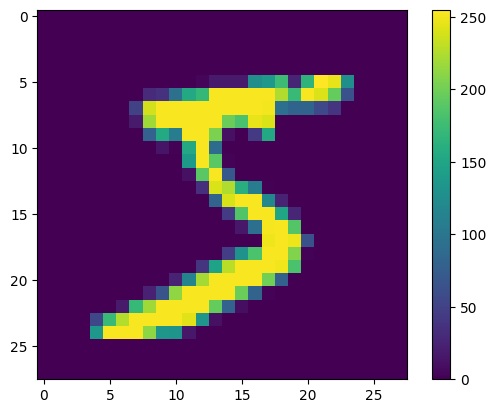

In [92]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Next, we have to normalize the pixels from the images so that instead of scaling from o to 255, they scale forma 0 to 1.

In [93]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Then we can show the first 25 images of the array and their training results.

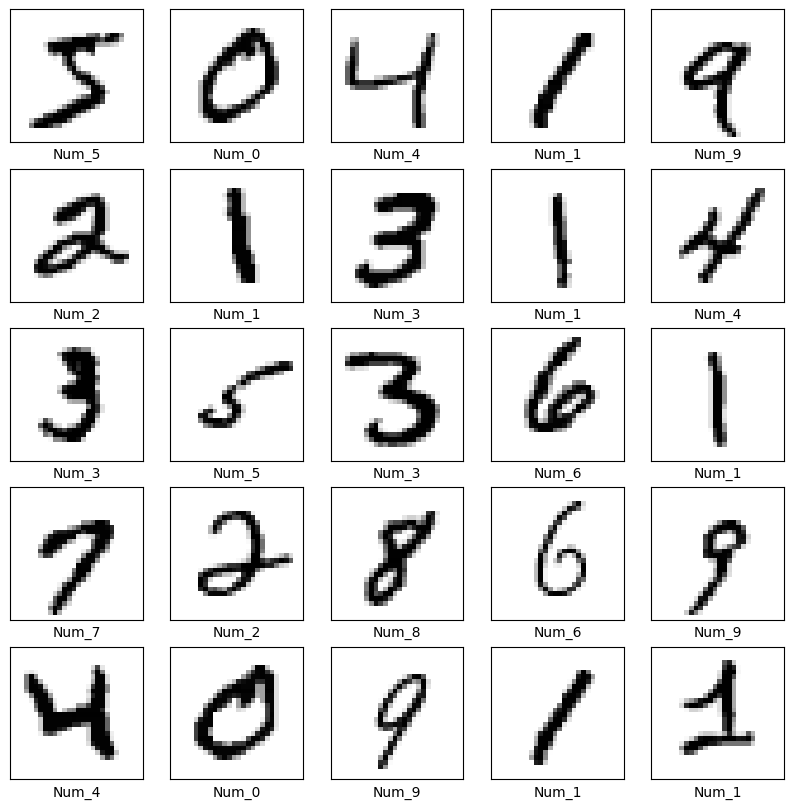

In [94]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Now, we have to define and configure the model to be used on the program.

In [95]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [96]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Then, we have to fit the newly defined model to the trained images so that it can make predictions. It will train with epochs and each time it will show the loss and accuaracy of the model predictions.

In [97]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2601 - accuracy: 0.9256
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1132 - accuracy: 0.9668
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0764 - accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0581 - accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0452 - accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0368 - accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0282 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0235 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0190 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.015

Next, the current accuaracy and loss will be displayed for the trained model.

In [98]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0734 - accuracy: 0.9795 - 606ms/epoch - 2ms/step

Test accuracy: 0.9794999957084656


Now the model will test its training with the 'train_images' on the 'test_images'.

In [99]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


And show the array result, showing the probability of the image being one of the 10 labels.

In [100]:
predictions[0]

array([3.4642453e-09, 5.3430016e-12, 6.6495338e-09, 7.8847825e-06,
       1.1088633e-15, 4.9642530e-09, 2.2021863e-15, 9.9999148e-01,
       3.8221970e-07, 2.4182418e-07], dtype=float32)

And will choose the label with the most probability of being correctly classified for this image.

In [101]:
np.argmax(predictions[0])

7

In [102]:
test_labels[0]

7

Then we will define the function for the graphic results of the predictions made, showing the porbability of each of the classes in each of the tested images.

In [103]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Then we will show some of the graphic results of the tested images with their probabilities.

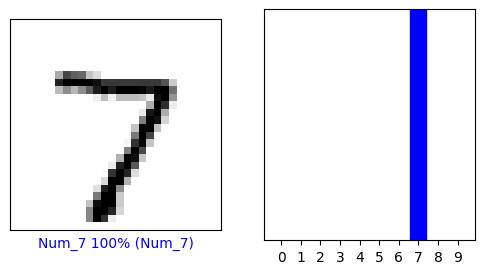

In [61]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

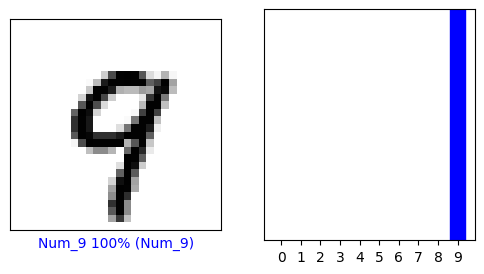

In [55]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Then, we´ll show 15 results of the tested images.

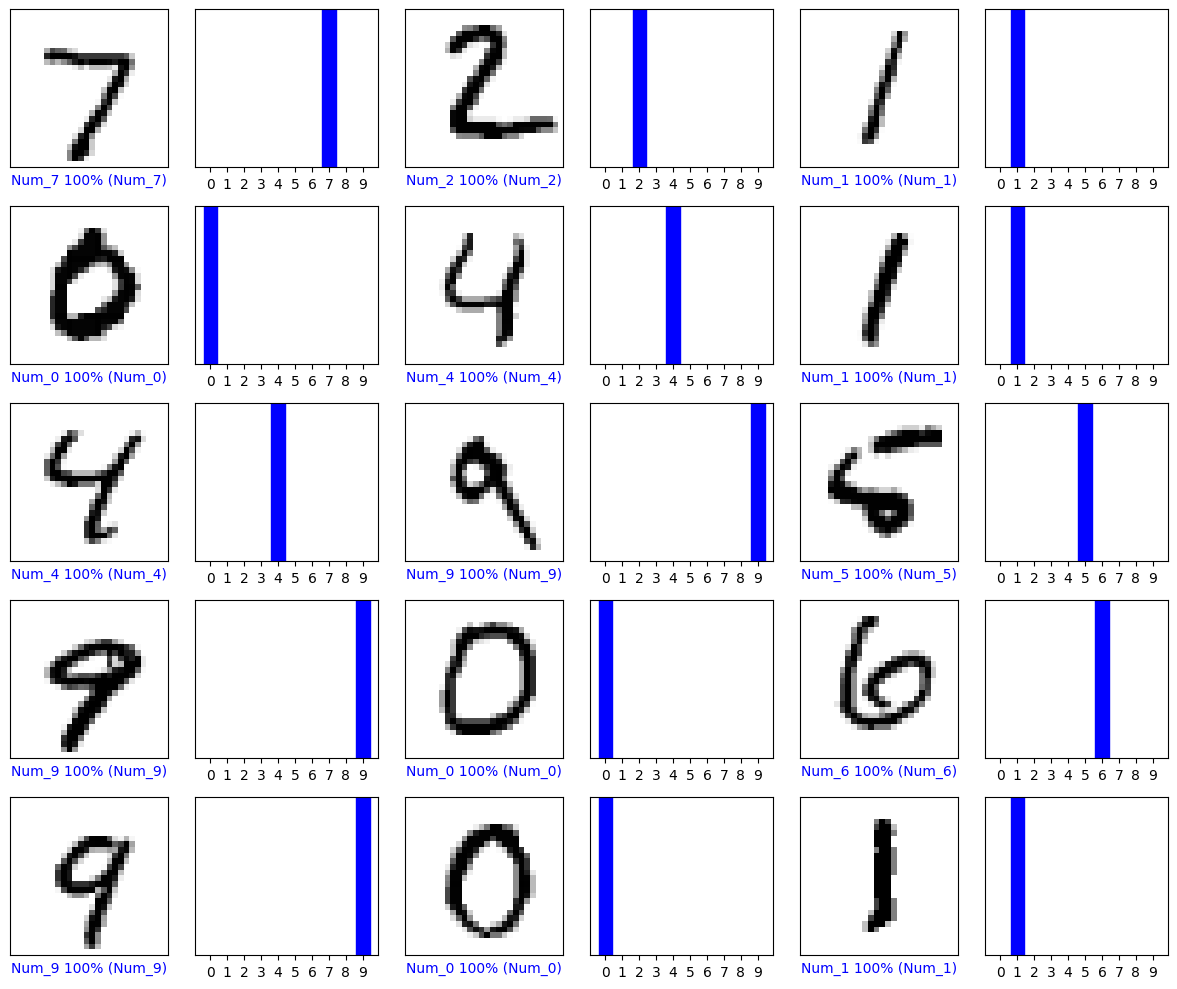

In [62]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()